# SVM

In [27]:
bdf = pd.read_csv('infolist.csv')
bdf.set_index('기업명', inplace=True)

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# feature와 target 분리
yt=np.array(bdf['금액합계2020'])
xt=bdf.drop(['금액합계2020'], axis=1)
xt=np.array(xt)

scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

In [29]:
scores = []
for thisC in [*range(3500000,3500010)]:
    svr=SVR(kernel='rbf',C=thisC, gamma=.1)
    model=svr.fit(xtrain,ytrain)
    scoreTrain=model.score(xtrain,ytrain)
    scoreTest=model.score(xtest,ytest)
    print("rbf SVR : C:{}, training score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest]) #training score와 test score 탐색, 현재 비율이 가장 score 높게 나왔음 이 코드 생략 가능

rbf SVR : C:3500000, training score:0.989920, test score:0.993394
rbf SVR : C:3500001, training score:0.989920, test score:0.993394
rbf SVR : C:3500002, training score:0.989920, test score:0.993394
rbf SVR : C:3500003, training score:0.989920, test score:0.993394
rbf SVR : C:3500004, training score:0.989921, test score:0.993394
rbf SVR : C:3500005, training score:0.989921, test score:0.993394
rbf SVR : C:3500006, training score:0.989921, test score:0.993394
rbf SVR : C:3500007, training score:0.989921, test score:0.993394
rbf SVR : C:3500008, training score:0.989921, test score:0.993394
rbf SVR : C:3500009, training score:0.989921, test score:0.993394


In [30]:
test1=bdf.drop(['금액합계2017'],axis=1)
testmat=np.array(test1)
test1=scaler.fit_transform(test1)
model=SVR(kernel='rbf', C=3500000, gamma=.1).fit(xtrain, ytrain) #2021년 예측

prediction1=model.predict(test1)
pred1=pd.DataFrame(prediction1, columns=['2021년 예측'])

In [31]:
test2=bdf.drop(['금액합계2020'],axis=1)
testmat=np.array(test2)
test2=scaler.fit_transform(test2)
#test(DF -> array)
model=SVR(kernel='rbf', C=3500000, gamma=.1).fit(xtrain, ytrain) #2020년 예측

prediction2=model.predict(test2)
pred2=pd.DataFrame(prediction2, columns=['2020년 예측'])

In [32]:
predlst=[]
for i in range(len(prediction1)):
    if (prediction1[i]-prediction2[i]>0):
        predlst.append('증가')
    elif(prediction1[i]-prediction2[i]<0): 
        predlst.append('감소')
    else:
        predlst.append('동률')

In [33]:
predic=pd.DataFrame(predlst, columns=['증감 예측'])

predic = predic.set_index(bdf.index)

In [34]:
predic

,증감 예측
기업명,
(유) 수현,감소
(유) 휴먼테크,증가
(유)고흥철망,증가
(유)대호이엔씨,증가
(유)도유,감소
...,...
흥진산업,증가
흥진산업,감소
흥진산업,증가


# 정확도 시각화

In [48]:
realdf=bdf.loc[:,['금액합계2020']]

realdf=realdf.astype(float)
realdf = realdf.reset_index(drop=True)

In [50]:
p=pred1.join([pred2, realdf])


In [51]:
p

,2021년 예측,2020년 예측,금액합계2020
0,12641.468241,12988.998491,11596.0
1,325781.771525,178830.199002,155870.0
2,50748.046234,33736.910210,31674.0
3,138284.723680,127817.925624,110348.0
4,19094.600784,39071.490485,37401.0
...,...,...,...
1081,27426.908680,16858.544850,18481.0
1082,-1162.301106,77075.380518,75421.0
1083,30750.479632,20243.098771,18481.0
1084,2862.866797,78988.914076,75421.0


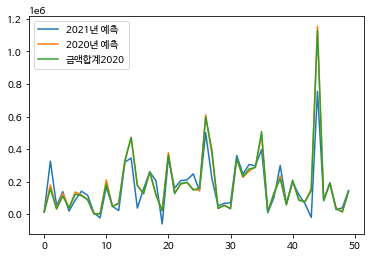

In [53]:
import matplotlib.pyplot as plt
p=p.head(50)

p.plot() #초록선과 주황선이 거의 일치함 확인 가능